In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import os

# Atur random seed untuk reproduksibilitas
np.random.seed(42)
tf.random.set_seed(42)

# Fungsi pembantu untuk plot gambar
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# Fungsi pembantu untuk menampilkan perbandingan gambar asli dan hasil rekonstruksi
def show_reconstructions(model, images=None, n_images=5):
    # Jika tidak ada gambar yang diberikan, gunakan set validasi default
    if images is None:
        # X_valid harus sudah didefinisikan sebelumnya saat data dimuat
        images = X_valid

    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
    plt.show()

In [ ]:
# ==============================================================================
# 1. MEMUAT DATASET FASHION MNIST
# ==============================================================================

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# ==============================================================================
# 2. PCA DENGAN UNDERCOMPLETE LINEAR AUTOENCODER
# ==============================================================================
print("--- Bagian 2: PCA with an Undercomplete Linear Autoencoder ---")

# Membuat data 3D sintetis untuk demonstrasi PCA
np.random.seed(4)
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train_3d = generate_3d_data(60)
X_train_3d = X_train_3d - X_train_3d.mean(axis=0, keepdims=True)

# Membangun autoencoder linear
encoder_pca = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder_pca = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder_pca = keras.models.Sequential([encoder_pca, decoder_pca])

autoencoder_pca.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.1))
history_pca = autoencoder_pca.fit(X_train_3d, X_train_3d, epochs=20)
codings_pca = encoder_pca.predict(X_train_3d)

# Visualisasi hasil PCA
fig = plt.figure(figsize=(4,3))
plt.plot(codings_pca[:,0], codings_pca[:, 1], "b.")
plt.xlabel("<span class="math-inline">z\_1</span>", fontsize=18)
plt.ylabel("<span class="math-inline">z\_2</span>", fontsize=18, rotation=0)
plt.grid(True)
plt.title("Hasil PCA dari Autoencoder Linear")
plt.show()


--- Bagian 3: Stacked Autoencoder ---
Melatih Stacked Autoencoder...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3983 - val_loss: 0.3217
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3128 - val_loss: 0.3101
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.3052 - val_loss: 0.3052
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.3007 - val_loss: 0.3019
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2978 - val_loss: 0.2997
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.2958 - val_loss: 0.2979
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 0.2942 - val_loss: 0.2959
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2928 - val_loss: 0.2941
Epoch 9/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2915 - val_loss: 0.2932
Epoch 10/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2904 - val_loss: 0.2916
Epoch 11/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.2894 - val_loss: 0.2907
Epoch 12/20
1719/1719 ━

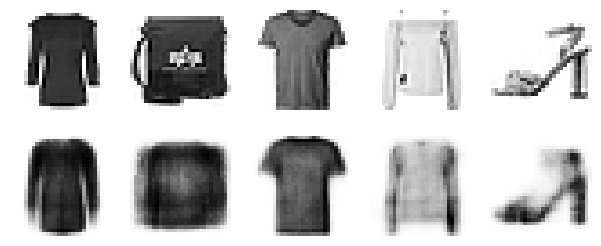

In [6]:
# ==============================================================================
# 3. STACKED AUTOENCODER
# ==============================================================================
print("\n--- Bagian 3: Stacked Autoencoder ---")

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0))

print("Melatih Stacked Autoencoder...")
history_stacked = stacked_ae.fit(X_train, X_train, epochs=20, validation_data=(X_valid, X_valid))

print("\nVisualisasi hasil rekonstruksi Stacked Autoencoder...")
show_reconstructions(stacked_ae)


--- Bagian 4: Stacked Autoencoder with Tied Weights ---
Melatih Autoencoder dengan Tied Weights...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.3897 - val_loss: 0.3104
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.3033 - val_loss: 0.2983
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2957 - val_loss: 0.2942
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.2919 - val_loss: 0.2913
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.2894 - val_loss: 0.2896
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.2877 - val_loss: 0.2883
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.2863 - val_loss: 0.2871
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2853 - val_loss: 0.2861
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2844 - val_loss: 0.2852
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2836 - val_loss: 0.2845

Visualisasi hasil rekonstruksi (Tied Weights)...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


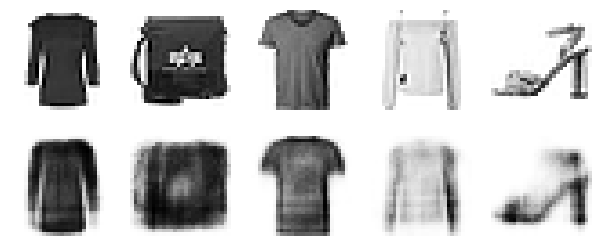

In [8]:
# ==============================================================================
# 4. STACKED AUTOENCODER DENGAN TYING WEIGHTS
# ==============================================================================
print("\n--- Bagian 4: Stacked Autoencoder with Tied Weights ---")

class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        # PERBAIKAN: Menggunakan self.dense.kernel.shape[0] bukan self.dense.input_shape[-1]
        self.biases = self.add_weight(name="bias",
                                      initializer="zeros",
                                      shape=[self.dense.kernel.shape[0]])
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

# Definisikan layer dense sekali saja untuk di-reuse
dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])
tied_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0))

print("Melatih Autoencoder dengan Tied Weights...")
history_tied = tied_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

print("\nVisualisasi hasil rekonstruksi (Tied Weights)...")
show_reconstructions(tied_ae)


--- Bagian 5: Denoising Autoencoder ---
Melatih Denoising Autoencoder...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.3999 - val_loss: 0.3193
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3199 - val_loss: 0.3122
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.3128 - val_loss: 0.3067
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.3087 - val_loss: 0.3035
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.3060 - val_loss: 0.3026
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3040 - val_loss: 0.2998
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.3024 - val_loss: 0.2985
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.3011 - val_loss: 0.2975
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.3001 - val_loss: 0.2975
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2992 - val_loss: 0.2959

Visualisasi hasil Denoising...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


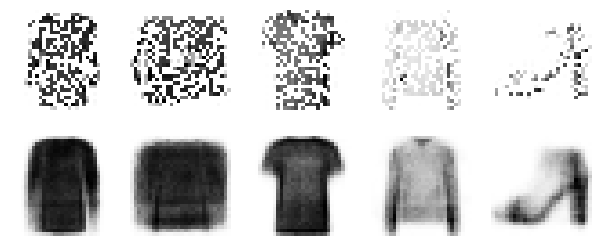

In [9]:
# ==============================================================================
# 5. DENOISING AUTOENCODER
# ==============================================================================
print("\n--- Bagian 5: Denoising Autoencoder ---")

# Menggunakan dropout sebagai metode untuk menambahkan noise
denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5), # Tambahkan noise
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0))

print("Melatih Denoising Autoencoder...")
history_denoising = denoising_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

# Menampilkan hasil rekonstruksi dari gambar yang diberi noise
print("\nVisualisasi hasil Denoising...")
tf.random.set_seed(42)
np.random.seed(42)
noisy_images = keras.layers.Dropout(0.5)(X_valid, training=True)
show_reconstructions(denoising_ae, noisy_images)


--- Bagian 6: Sparse Autoencoder (with L1 regularization) ---
Melatih Sparse Autoencoder (L1)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.6171 - val_loss: 0.4934
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.4902 - val_loss: 0.4929
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.4899 - val_loss: 0.4928
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.4898 - val_loss: 0.4927
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.4898 - val_loss: 0.4927
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.4897 - val_loss: 0.4927
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.4897 - val_loss: 0.4927
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.4897 - val_loss: 0.4927
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.4897 - val_loss: 0.4927
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.4897 - val_loss: 0.4926



Visualisasi hasil rekonstruksi (Sparse L1)...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


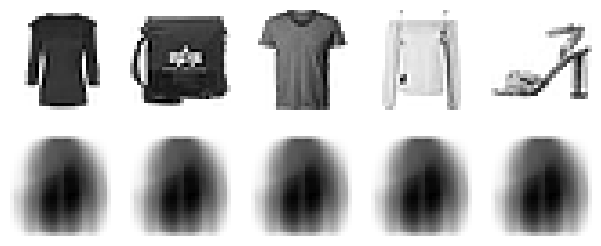

In [10]:
# ==============================================================================
# 6. SPARSE AUTOENCODER
# ==============================================================================
print("\n--- Bagian 6: Sparse Autoencoder (with L1 regularization) ---")

sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-3)
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0))

print("Melatih Sparse Autoencoder (L1)...")
history_sparse_l1 = sparse_l1_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

print("\nVisualisasi hasil rekonstruksi (Sparse L1)...")
show_reconstructions(sparse_l1_ae)


--- Bagian 7: Variational Autoencoder (VAE) (Versi Perbaikan) ---
Melatih Variational Autoencoder...
Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_88']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_97']
Received: inputs=Tensor(shape=(None, 10))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_88']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_97']
Received: inputs=Tensor(shape=(None, 10))
  warnings.warn(msg)


430/430 - 8s - 19ms/step - loss: 0.4128 - val_loss: 0.3624
Epoch 2/25
430/430 - 5s - 12ms/step - loss: 0.3554 - val_loss: 0.3511
Epoch 3/25
430/430 - 6s - 14ms/step - loss: 0.3449 - val_loss: 0.3429
Epoch 4/25
430/430 - 5s - 12ms/step - loss: 0.3383 - val_loss: 0.3366
Epoch 5/25
430/430 - 6s - 14ms/step - loss: 0.3338 - val_loss: 0.3315
Epoch 6/25
430/430 - 5s - 12ms/step - loss: 0.3306 - val_loss: 0.3315
Epoch 7/25
430/430 - 5s - 12ms/step - loss: 0.3283 - val_loss: 0.3287
Epoch 8/25
430/430 - 6s - 14ms/step - loss: 0.3265 - val_loss: 0.3290
Epoch 9/25
430/430 - 10s - 24ms/step - loss: 0.3251 - val_loss: 0.3267
Epoch 10/25
430/430 - 10s - 22ms/step - loss: 0.3239 - val_loss: 0.3246
Epoch 11/25
430/430 - 10s - 23ms/step - loss: 0.3228 - val_loss: 0.3244
Epoch 12/25
430/430 - 10s - 24ms/step - loss: 0.3218 - val_loss: 0.3257
Epoch 13/25
430/430 - 7s - 15ms/step - loss: 0.3211 - val_loss: 0.3237
Epoch 14/25
430/430 - 9s - 21ms/step - loss: 0.3203 - val_loss: 0.3211
Epoch 15/25
430/430 - 

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_97']
Received: inputs=Tensor(shape=(12, 10))
  warnings.warn(msg)


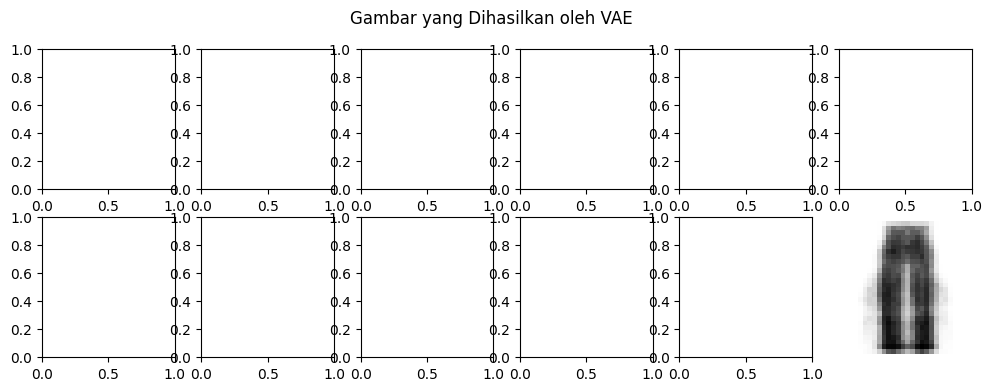

In [12]:
# ==============================================================================
# 7. VARIATIONAL AUTOENCODER (VAE) (VERSI PERBAIKAN)
# ==============================================================================
print("\n--- Bagian 7: Variational Autoencoder (VAE) (Versi Perbaikan) ---")
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean

class KLDivergenceLayer(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        kl_loss = -0.5 * tf.reduce_sum(
            1 + log_var - tf.square(mean) - tf.exp(log_var), axis=-1
        )
        self.add_loss(tf.reduce_mean(kl_loss) / 784.0)
        return inputs

codings_size = 10
# Encoder
inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings_mean, codings_log_var = KLDivergenceLayer()([codings_mean, codings_log_var])
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.Model(inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

# Decoder
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.Model(inputs=[decoder_inputs], outputs=[outputs])

# VAE Model
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.Model(inputs=[inputs], outputs=[reconstructions])

variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop")
print("Melatih Variational Autoencoder...")
history_vae = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128, validation_data=(X_valid, X_valid), verbose=2)

print("\nMenghasilkan gambar dengan VAE...")
codings_vae_gen = tf.random.normal(shape=[12, codings_size])
images_vae = variational_decoder(codings_vae_gen).numpy()
fig, axes = plt.subplots(2, 6, figsize=(12, 4))
for i, ax in enumerate(axes.flat): plot_image(images_vae[i])
fig.suptitle("Gambar yang Dihasilkan oleh VAE")
plt.show()


--- Bagian 8: Generative Adversarial Networks (GAN) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Melatih GAN dasar...
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


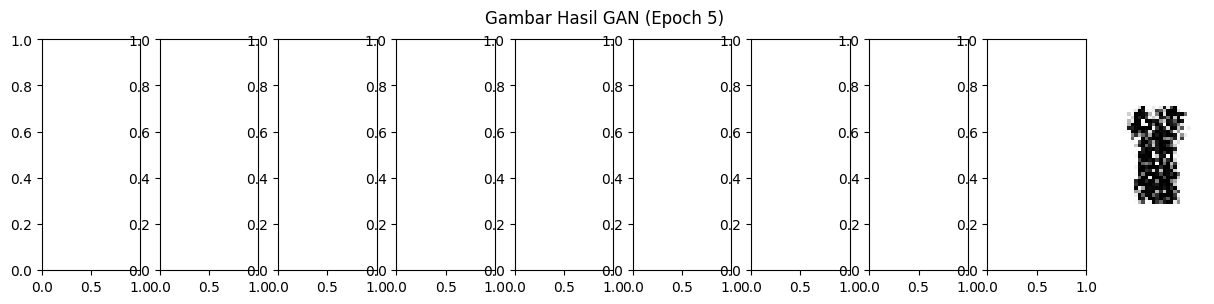

Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


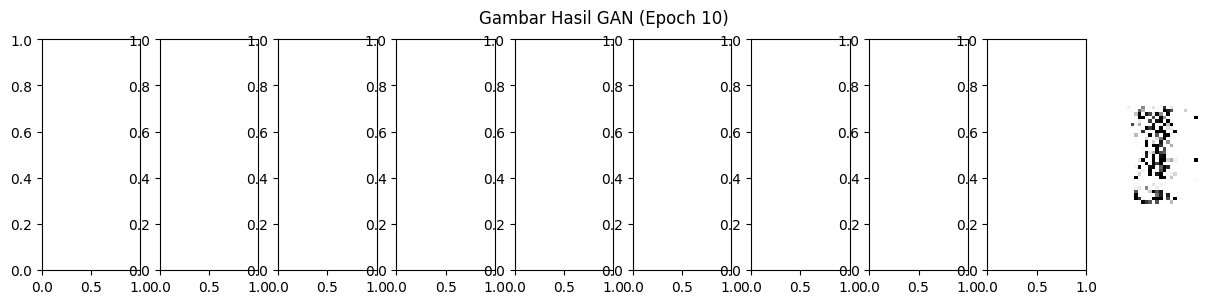

In [13]:
# ==============================================================================
# 8. GENERATIVE ADVERSARIAL NETWORKS (GANs)
# ==============================================================================
print("\n--- Bagian 8: Generative Adversarial Networks (GAN) ---")
codings_size_gan = 30
generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size_gan]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

batch_size_gan = 32
dataset_gan = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset_gan = dataset_gan.batch(batch_size_gan, drop_remainder=True).prefetch(1)

def train_gan(gan, dataset, batch_size, codings_size, n_epochs=10):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print(f"Epoch {epoch + 1}/{n_epochs}")
        for X_batch in dataset:
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        if (epoch + 1) % 5 == 0 or epoch == n_epochs - 1:
            noise = tf.random.normal(shape=[10, codings_size])
            generated_images = generator.predict(noise)
            fig, axes = plt.subplots(1, 10, figsize=(15, 3))
            for i, ax in enumerate(axes.flat): plot_image(generated_images[i])
            fig.suptitle(f"Gambar Hasil GAN (Epoch {epoch+1})")
            plt.show()

print("Melatih GAN dasar...")
train_gan(gan, dataset_gan, batch_size_gan, codings_size_gan, n_epochs=10)

In [ ]:
# ==============================================================================
# 9. DEEP CONVOLUTIONAL GAN (DCGAN)
# ==============================================================================
print("\n--- Bagian 9: Deep Convolutional GAN (DCGAN) ---")
codings_size_dcgan = 100
dcgan_generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size_dcgan]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same", activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same", activation="tanh")
])
dcgan_discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same",
                       activation=keras.layers.LeakyReLU(0.2),
                       input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same",
                       activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
dcgan = keras.models.Sequential([dcgan_generator, dcgan_discriminator])
dcgan_discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
dcgan_discriminator.trainable = False
dcgan.compile(loss="binary_crossentropy", optimizer="rmsprop")
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1.
batch_size_dcgan = 32
dataset_dcgan = tf.data.Dataset.from_tensor_slices(X_train_dcgan).shuffle(1000)
dataset_dcgan = dataset_dcgan.batch(batch_size_dcgan, drop_remainder=True).prefetch(1)
print("Melatih DCGAN...")
train_gan(dcgan, dataset_dcgan, batch_size_dcgan, codings_size_dcgan, n_epochs=10)

print("\n--- Selesai Reproduksi Kode Chapter 17 ---")



--- Bagian 9: Deep Convolutional GAN (DCGAN) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Melatih DCGAN...
Epoch 1/10
Epoch 2/10
Epoch 3/10
